<a href="https://colab.research.google.com/github/Toeysamm/homework/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-27ca1096-5681-b38d-b6fd-8d8f4b4ad7d2)


In [ ]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Churn_Modelling.csv"
data = pd.read_csv(path)
data 

'''

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\npath="/content/drive/MyDrive/Churn_Modelling.csv"\ndata = pd.read_csv(path)\ndata \n\n'

In [ ]:
#2
url = "https://drive.google.com/file/d/1-mT6iykRVgRU3blYpX5i_YxhbqjUJepP/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

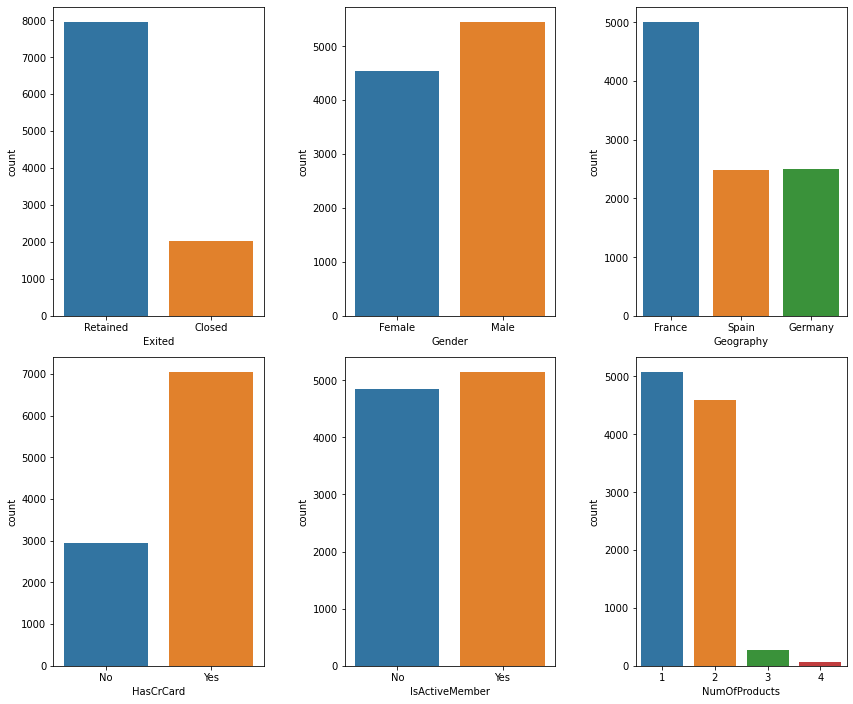

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12,10))
fig.tight_layout(pad=2, w_pad=5 , h_pad=2)
sns.countplot(df['Exited'], ax=ax[0,0])
ax[0,0].set_xticklabels(["Retained", "Closed"])
sns.countplot(df['Gender'], ax=ax[0,1])
sns.countplot(df['Geography'], ax=ax[0,2])
sns.countplot(df['HasCrCard'], ax=ax[1,0])
ax[1,0].set_xticklabels(["No", "Yes"])
sns.countplot(df['IsActiveMember'], ax=ax[1,1])
ax[1,1].set_xticklabels(["No", "Yes"])
sns.countplot(df['NumOfProducts'], ax=ax[1,2])

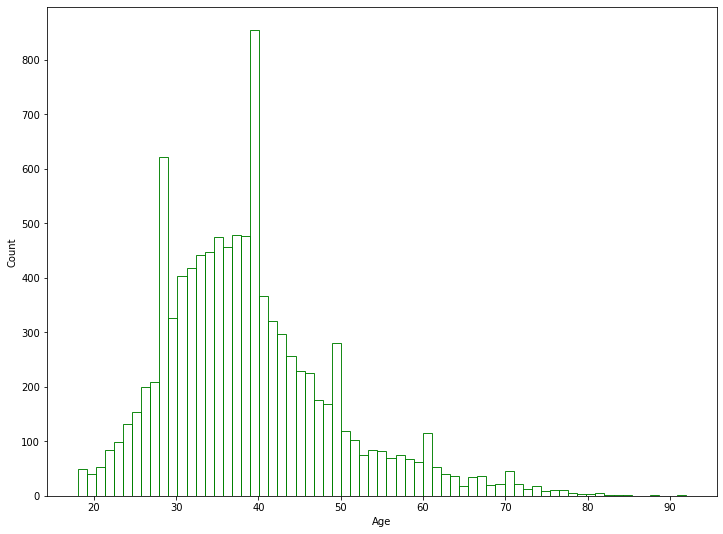

In [ ]:
plt.figure(figsize=(12, 9))
sns.histplot(df['Age'],color="green",fill=False)


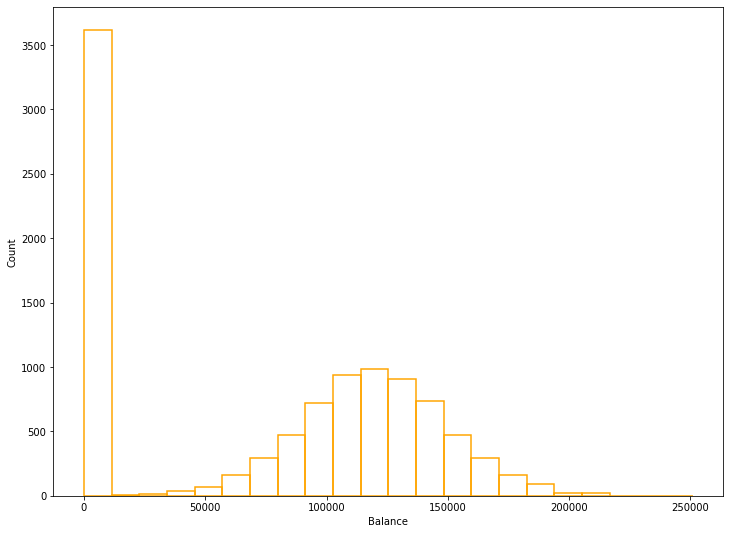

In [ ]:
plt.figure(figsize=(12, 9))
sns.histplot(df['Balance'],color="orange",fill=False)

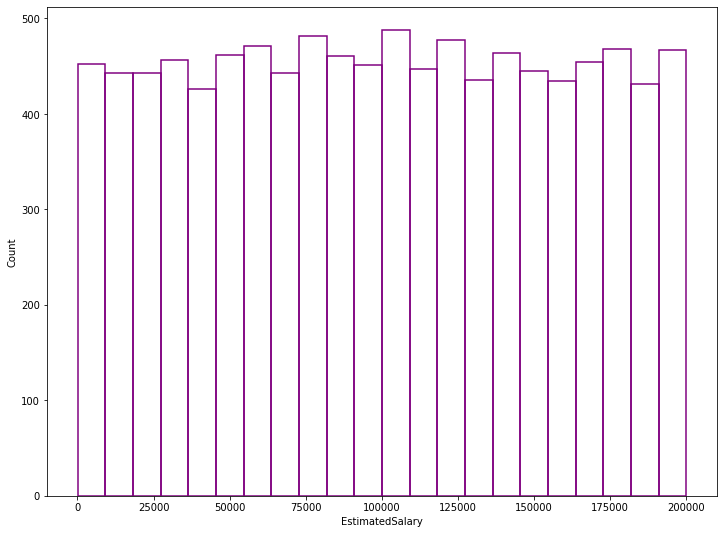

In [ ]:
plt.figure(figsize=(12, 9))
sns.histplot(df['EstimatedSalary'],color="purple",fill=False)

In [ ]:
#Cleansing+Normalize

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [ ]:
df['Gender'].replace(['Female'],0 , inplace=True)

In [ ]:
df['Gender'].replace(['Male'],1 , inplace=True)

In [ ]:
df['Gender'].unique()

array([0, 1])

In [ ]:
dummy=pd.get_dummies(df.Geography)
df=pd.concat([df, dummy], axis=1)
df.drop('Geography', axis=1, inplace=True)

In [ ]:
y = df['Exited']
df.drop(columns=['Exited'], axis=1, inplace=True)

In [ ]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scalar = preprocessing.MinMaxScaler()
col=df.columns
df=scalar.fit_transform(df)
df=pd.DataFrame(df,columns=col)

In [ ]:
df=pd.DataFrame(df,columns=col)

In [ ]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0
9996,0.332,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0
9997,0.718,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0
9998,0.844,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',k_neighbors=1,random_state=1234)
X_data, Y_data = smote.fit_resample(df,y)

In [ ]:
X_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,0.538000,0.0,0.324324,0.200000,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.516000,0.0,0.310811,0.100000,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304000,0.0,0.324324,0.800000,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.698000,0.0,0.283784,0.100000,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
4,1.000000,0.0,0.337838,0.200000,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0.767611,1.0,0.328417,0.257571,0.324116,1.000000,0.0,1.0,0.595198,1.0,0.0,0.0
15922,0.597589,1.0,0.383748,0.440066,0.259230,0.000000,1.0,0.0,0.806163,1.0,0.0,0.0
15923,0.620099,0.0,0.274668,0.343230,0.710974,0.261284,0.0,0.0,0.318542,1.0,0.0,0.0
15924,0.559889,1.0,0.240673,0.861966,0.406919,0.666667,1.0,0.0,0.664902,1.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


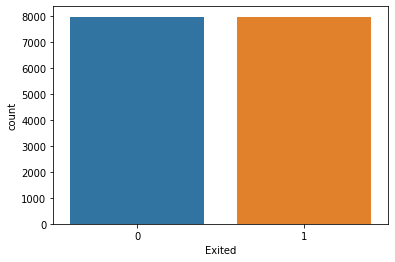

In [ ]:
sns.countplot(Y_data)

In [ ]:
#ML

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data , Y_data , test_size = 0.3, random_state = 0)

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score , roc_curve , roc_auc_score , confusion_matrix

In [ ]:
def predict_y(X_test,model):
  if str(type(model)) == "<class 'keras.engine.sequential.Sequential'>":
    Y_predict = model.predict(X_test)
    for i in range(0, len(Y_predict)):
      if Y_predict[i] > 0.5:
        Y_predict[i] = 1
      else:
        Y_predict[i] = 0
  else:
    Y_predict=model.predict(X_test)
  return Y_predict

In [ ]:
def acc_score(X_test,Y_test,model):
  Y_predict = predict_y(X_test,model)
  acc = accuracy_score(Y_test, Y_predict)
  print(f"Accuracy = {acc*100:.2f}%")

def class_report (X_test,Y_test,model):
  Y_predict = predict_y(X_test,model)
  #print(classification_report(Y_test,Y_predict))

  #code for indent report problem below
  rp=classification_report(Y_test,Y_predict,output_dict=True)
  rpd=pd.DataFrame(rp).transpose()
  rpd.rename(index={'0.0':'retrained','1.0':'closed'},inplace=True)
  #rpd.drop(index='accuracy',inplace=True)
  rpd = rpd.astype({'support':'int'})
  pd.set_option('display.float_format', '{:.4f}'.format)
  print(f'\nClassification Report\n')
  mx=rpd['support'].max()
  rpd['support'].replace(0,mx,inplace=True)
  display(rpd)


def plot_crv(X_test,Y_test,model):
  Prob_Y_predict = model.predict_proba(X_test)[::,1]
  print(f"\nAUC_ROC = {roc_auc_score(Y_test,Prob_Y_predict)*100:.2f}%\n")
  fpr, tpr, _ = metrics.roc_curve(Y_test,  Prob_Y_predict)
  plt.plot(fpr,tpr)
  plt.plot([0,1], [0,1], 'red')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

def plot_cfm(X_test,Y_test,model):
  if str(type(model)) == "<class 'keras.engine.sequential.Sequential'>":
    shd='Purples'
  else:
    shd='YlGnBu'
  Y_predict = predict_y(X_test,model)
  cf_matrix = confusion_matrix(Y_test, Y_predict)
  print("\nConfusion Matrix")
  print(cf_matrix)
  ax = sns.heatmap(cf_matrix, annot=True, cmap=shd,fmt='g')

  ax.set_title('Confusion Matrix Heatmap');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(['Retrained','Closed'])
  ax.yaxis.set_ticklabels(['Retrained','Closed'])
  plt.show()

Accuracy = 83.36%

Classification Report



,precision,recall,f1-score,support
retrained,0.8453,0.8159,0.8303,2384
closed,0.8228,0.8513,0.8368,2394
accuracy,0.8336,0.8336,0.8336,4778
macro avg,0.8340,0.8336,0.8335,4778
weighted avg,0.8340,0.8336,0.8336,4778



AUC_ROC = 83.36%



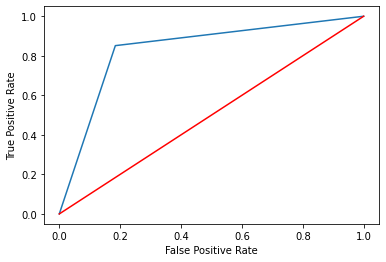


Confusion Matrix
[[1945  439]
 [ 356 2038]]


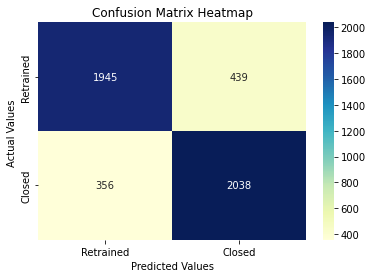

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
acc_score(X_test,Y_test,DT)
class_report (X_test,Y_test,DT)
plot_crv(X_test,Y_test,DT)
plot_cfm(X_test,Y_test,DT)


Accuracy = 89.70%

Classification Report



,precision,recall,f1-score,support
retrained,0.9067,0.8846,0.8955,2384
closed,0.8878,0.9094,0.8985,2394
accuracy,0.8970,0.8970,0.8970,4778
macro avg,0.8973,0.8970,0.8970,4778
weighted avg,0.8973,0.8970,0.8970,4778



AUC_ROC = 96.36%



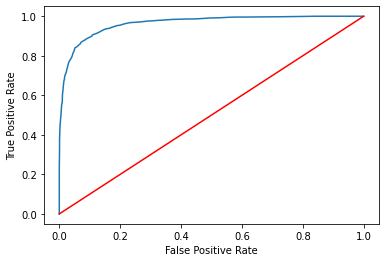


Confusion Matrix
[[2109  275]
 [ 217 2177]]


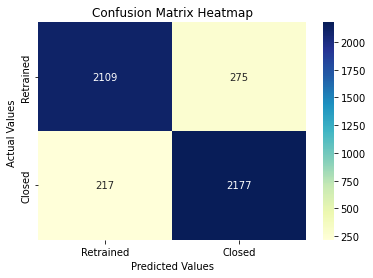

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
acc_score(X_test,Y_test,RF)
class_report (X_test,Y_test,RF)
plot_crv(X_test,Y_test,RF)
plot_cfm(X_test,Y_test,RF)

Accuracy = 84.72%

Classification Report



,precision,recall,f1-score,support
retrained,0.8398,0.8574,0.8485,2384
closed,0.8549,0.8371,0.8459,2394
accuracy,0.8472,0.8472,0.8472,4778
macro avg,0.8474,0.8472,0.8472,4778
weighted avg,0.8474,0.8472,0.8472,4778



AUC_ROC = 92.45%



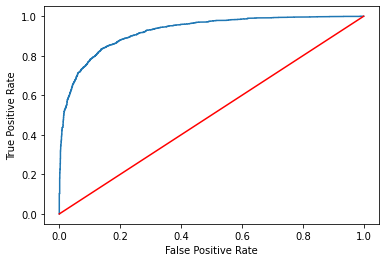


Confusion Matrix
[[2044  340]
 [ 390 2004]]


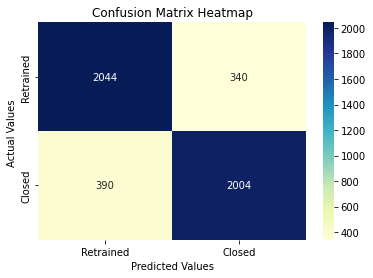

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)
acc_score(X_test,Y_test,GB)
class_report (X_test,Y_test,GB)
plot_crv(X_test,Y_test,GB)
plot_cfm(X_test,Y_test,GB)

Accuracy = 87.53%

Classification Report



,precision,recall,f1-score,support
retrained,0.8649,0.8888,0.8767,2384
closed,0.8862,0.8617,0.8738,2394
accuracy,0.8753,0.8753,0.8753,4778
macro avg,0.8755,0.8753,0.8752,4778
weighted avg,0.8756,0.8753,0.8752,4778



AUC_ROC = 94.32%



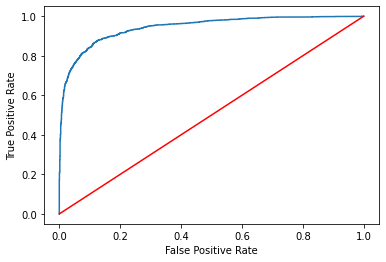


Confusion Matrix
[[2119  265]
 [ 331 2063]]


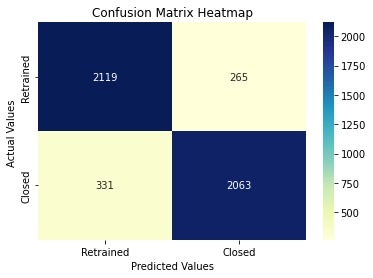

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate = 0.1, n_estimators = 180, max_depth = 3)
xgb_model.fit(X_train, Y_train)
acc_score(X_test,Y_test,xgb_model)
class_report (X_test,Y_test,xgb_model)
plot_crv(X_test,Y_test,xgb_model)
plot_cfm(X_test,Y_test,xgb_model)

In [ ]:
#MLP 

In [ ]:
np.random.seed(1150)
tf.random.set_seed(1112)

In [ ]:
X_train.shape

(11148, 12)

In [ ]:
Y_train.shape

(11148,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
mlp_model = tf.keras.models.Sequential()

# Input layer
mlp_model.add( tf.keras.Input(shape=(12,)) )

# Hidden layer
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden1') )  
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden2') )   
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden3') )   
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn3') )
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden4') )   
mlp_model.add( tf.keras.layers.Dropout(0.3) )                     

# Output layer
mlp_model.add(Dense(1, activation = 'sigmoid'))


mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 20)                260       
                                                                 
 bn1 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden2 (Dense)             (None, 20)                420       
                                                                 
 bn2 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden3 (Dense)             (None, 20)                420       
                                                                 
 bn3 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden4 (Dense)             (None, 20)                4

In [ ]:
mlp_model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
#model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

In [ ]:
history = mlp_model.fit ( X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback] )

Epoch 1/25
70/70 [==============================] - 4s 14ms/step - loss: 0.7061 - acc: 0.5542 - val_loss: 0.6819 - val_acc: 0.5883
Epoch 2/25
70/70 [==============================] - 0s 4ms/step - loss: 0.6382 - acc: 0.6425 - val_loss: 0.6631 - val_acc: 0.6139
Epoch 3/25
70/70 [==============================] - 0s 4ms/step - loss: 0.6082 - acc: 0.6667 - val_loss: 0.6371 - val_acc: 0.6318
Epoch 4/25
70/70 [==============================] - 0s 4ms/step - loss: 0.5846 - acc: 0.6877 - val_loss: 0.6063 - val_acc: 0.6695
Epoch 5/25
70/70 [==============================] - 0s 4ms/step - loss: 0.5640 - acc: 0.7063 - val_loss: 0.5742 - val_acc: 0.7009
Epoch 6/25
70/70 [==============================] - 0s 5ms/step - loss: 0.5383 - acc: 0.7328 - val_loss: 0.5218 - val_acc: 0.7475
Epoch 7/25
70/70 [==============================] - 0s 5ms/step - loss: 0.5130 - acc: 0.7455 - val_loss: 0.4952 - val_acc: 0.7529
Epoch 8/25
70/70 [==============================] - 0s 4ms/step - loss: 0.5005 - acc: 0.7

In [ ]:
!ls -lt

total 644
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch24_valloss0.43.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch22_valloss0.43.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch20_valloss0.43.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch17_valloss0.44.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch15_valloss0.44.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch13_valloss0.45.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch12_valloss0.45.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch09_valloss0.46.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch08_valloss0.48.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch07_valloss0.50.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch06_valloss0.52.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch05_valloss0.57.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch04_vallos

In [ ]:
#delete all save file in directory
#!rm *

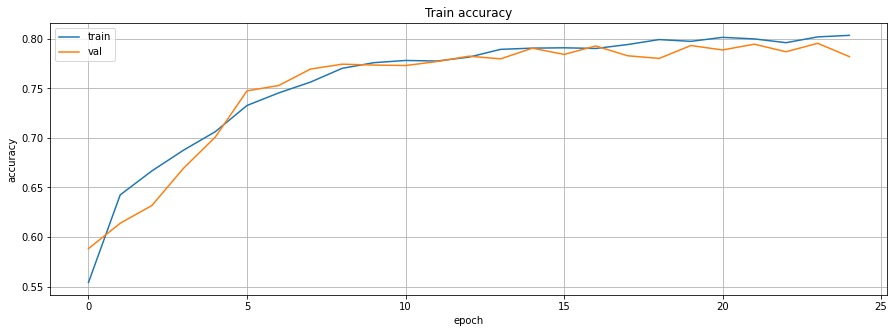

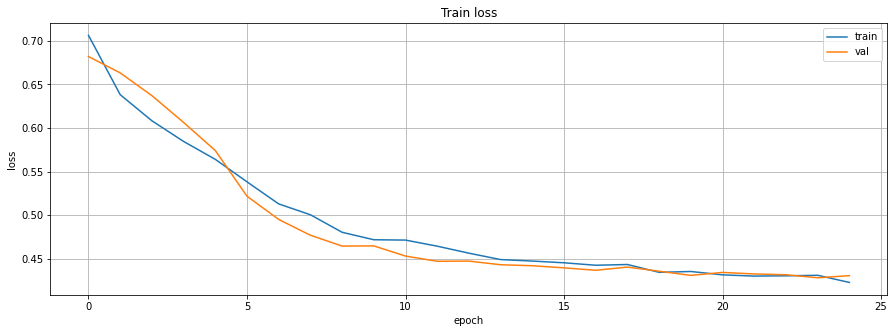

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
results = mlp_model.evaluate(X_test, Y_test, batch_size=128)
print( f"{mlp_model.metrics_names} = {results}" )

38/38 [==============================] - 0s 2ms/step - loss: 0.4294 - acc: 0.7947
['loss', 'acc'] = [0.4294212758541107, 0.7946839928627014]


Accuracy = 79.47%

Classification Report



,precision,recall,f1-score,support
retrained,0.7783,0.8230,0.8000,2384
closed,0.8130,0.7665,0.7891,2394
accuracy,0.7947,0.7947,0.7947,4778
macro avg,0.7956,0.7947,0.7945,4778
weighted avg,0.7957,0.7947,0.7945,4778



Confusion Matrix
[[1962  422]
 [ 559 1835]]


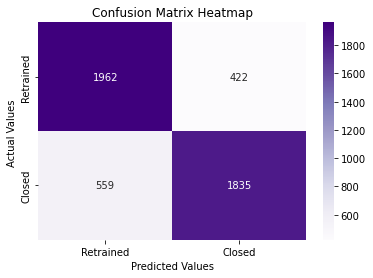

In [ ]:
acc_score(X_test,Y_test,mlp_model)
class_report (X_test,Y_test,mlp_model)
plot_cfm(X_test,Y_test,mlp_model)

In [ ]:
# iter 1

In [ ]:
np.random.seed(1234)
tf.random.set_seed(5678)

In [ ]:
X_train.shape

(11148, 12)

In [ ]:
Y_train.shape

(11148,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
mlp_model = tf.keras.models.Sequential()

# Input layer
mlp_model.add( tf.keras.Input(shape=(12,)) )

# Hidden layer
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden1') )  
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden2') )   
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden3') )   
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn3') )
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden4') )   
mlp_model.add( tf.keras.layers.Dropout(0.3) )                     

# Output layer
mlp_model.add(Dense(1, activation = 'sigmoid'))


mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 20)                260       
                                                                 
 bn1 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden2 (Dense)             (None, 20)                420       
                                                                 
 bn2 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden3 (Dense)             (None, 20)                420       
                                                                 
 bn3 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden4 (Dense)             (None, 20)               

In [ ]:
mlp_model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
#model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

In [ ]:
history = mlp_model.fit ( X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback] )

Epoch 1/25
70/70 [==============================] - 2s 7ms/step - loss: 0.6903 - acc: 0.5804 - val_loss: 0.6792 - val_acc: 0.5780
Epoch 2/25
70/70 [==============================] - 0s 5ms/step - loss: 0.6371 - acc: 0.6457 - val_loss: 0.6640 - val_acc: 0.6211
Epoch 3/25
70/70 [==============================] - 0s 5ms/step - loss: 0.6025 - acc: 0.6837 - val_loss: 0.6483 - val_acc: 0.6206
Epoch 4/25
70/70 [==============================] - 0s 5ms/step - loss: 0.5665 - acc: 0.7136 - val_loss: 0.6086 - val_acc: 0.6623
Epoch 5/25
70/70 [==============================] - 0s 5ms/step - loss: 0.5511 - acc: 0.7228 - val_loss: 0.5576 - val_acc: 0.7072
Epoch 6/25
70/70 [==============================] - 0s 5ms/step - loss: 0.5200 - acc: 0.7438 - val_loss: 0.5295 - val_acc: 0.7179
Epoch 7/25
70/70 [==============================] - 0s 5ms/step - loss: 0.5023 - acc: 0.7617 - val_loss: 0.4847 - val_acc: 0.7587
Epoch 8/25
70/70 [==============================] - 0s 5ms/step - loss: 0.4879 - acc: 0.76

In [ ]:
!ls -lt

total 1004
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch23_valloss0.42.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch22_valloss0.43.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch21_valloss0.43.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch19_valloss0.43.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch15_valloss0.44.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch13_valloss0.44.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch09_valloss0.47.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch08_valloss0.47.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch07_valloss0.48.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch06_valloss0.53.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch05_valloss0.56.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch04_valloss0.61.hdf5
-rw-r--r-- 1 root root 39800 Sep 14 16:33 bestmodel_epoch02_vallo

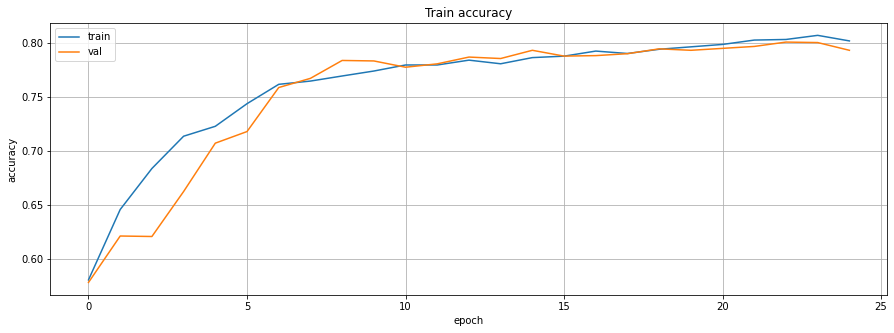

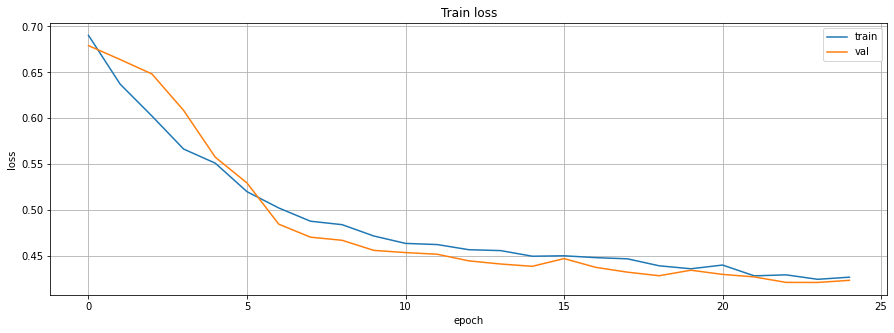

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
results1 = mlp_model.evaluate(X_test, Y_test, batch_size=128)
print( f"{mlp_model.metrics_names} = {results1}" )

38/38 [==============================] - 0s 2ms/step - loss: 0.4351 - acc: 0.7924
['loss', 'acc'] = [0.4350604712963104, 0.792381763458252]


Accuracy = 79.24%

Classification Report



,precision,recall,f1-score,support
retrained,0.7969,0.7836,0.7902,2384
closed,0.7880,0.8012,0.7945,2394
accuracy,0.7924,0.7924,0.7924,4778
macro avg,0.7925,0.7924,0.7924,4778
weighted avg,0.7925,0.7924,0.7924,4778



Confusion Matrix
[[1868  516]
 [ 476 1918]]


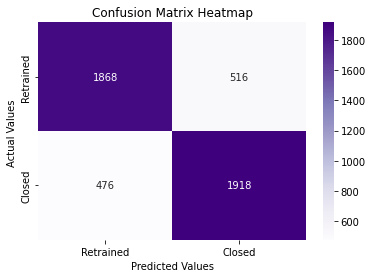

In [ ]:
acc_score(X_test,Y_test,mlp_model)
class_report (X_test,Y_test,mlp_model)
plot_cfm(X_test,Y_test,mlp_model)

In [ ]:
print(results)
print(results1)

[0.4294212758541107, 0.7946839928627014]
[0.4350604712963104, 0.792381763458252]
